# Load Data from GitHub

In [39]:
import pandas as pd
import numpy as np

github_url = "https://raw.githubusercontent.com/N-k-Siam/210113_KNN_Implementation/main/heart.csv"

df = pd.read_csv(github_url)
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# Separate features (X) and target (y)

In [41]:
X = df.drop('target', axis=1)
y = df['target']

# Target distribution

In [42]:
target_names = ['No Disease', 'Disease']
print(f"\nTarget distribution:")
print(y.value_counts())
print(f"\nClass balance:")
for i, name in enumerate(target_names):
    count = (y == i).sum()
    percentage = (count / len(y)) * 100
    print(f"  {name}: {count} ({percentage:.2f}%)")


Target distribution:
target
1    526
0    499
Name: count, dtype: int64

Class balance:
  No Disease: 499 (48.68%)
  Disease: 526 (51.32%)


#Train/Test Split

In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [44]:
X_train.shape[0]

820

In [45]:
X_test.shape[0]

205

# Feature Scaling

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Mean of scaled training features: {X_train_scaled.mean():.6f}")
print(f"Std of scaled training features: {X_train_scaled.std():.6f}")


Mean of scaled training features: -0.000000
Std of scaled training features: 1.000000


# Elbow Method - Finding Optimal K


In [47]:
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 101)
train_accuracies = []
test_accuracies = []
error_rates = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    train_acc = knn.score(X_train_scaled, y_train)
    test_acc = knn.score(X_test_scaled, y_test)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    error_rates.append(1 - test_acc)


optimal_k_idx = np.argmax(test_accuracies)
optimal_k = k_range[optimal_k_idx]
print(f"Optimal K (from Elbow Method): {optimal_k}")
print(f"Test Accuracy at K={optimal_k}: {test_accuracies[optimal_k_idx]:.4f}")


Optimal K (from Elbow Method): 1
Test Accuracy at K=1: 1.0000


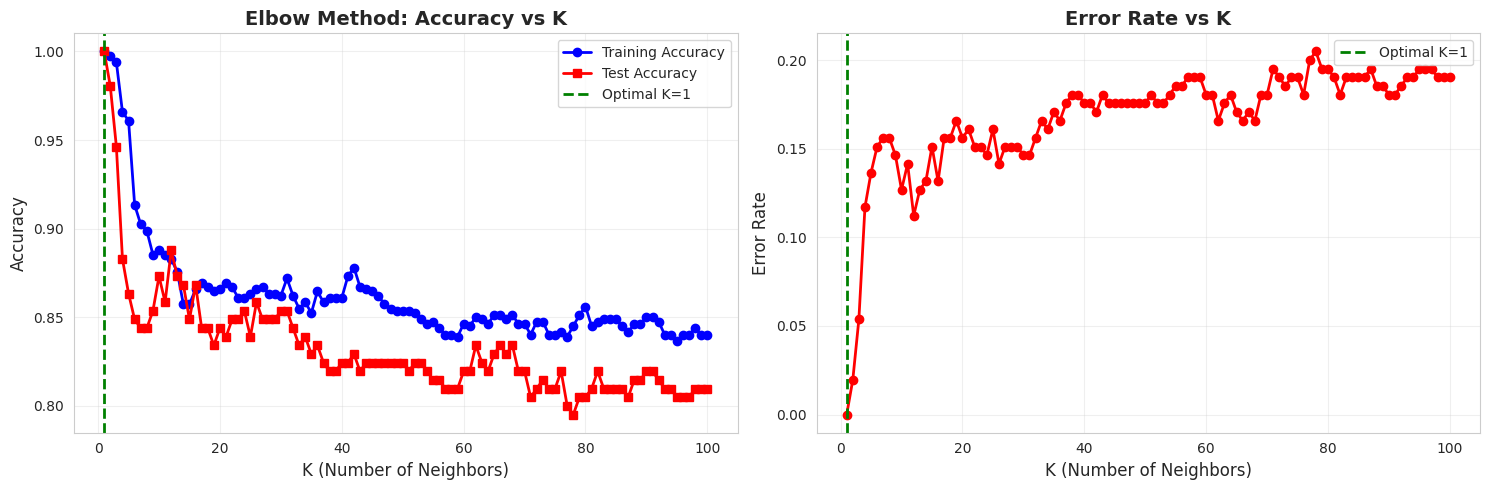

In [48]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Accuracy vs K
axes[0].plot(k_range, train_accuracies, 'b-o', label='Training Accuracy', linewidth=2)
axes[0].plot(k_range, test_accuracies, 'r-s', label='Test Accuracy', linewidth=2)
axes[0].axvline(x=optimal_k, color='green', linestyle='--', linewidth=2,
                label=f'Optimal K={optimal_k}')
axes[0].set_xlabel('K (Number of Neighbors)', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('Elbow Method: Accuracy vs K', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(alpha=0.3)

# Plot 2: Error Rate vs K
axes[1].plot(k_range, error_rates, 'r-o', linewidth=2, markersize=6)
axes[1].axvline(x=optimal_k, color='green', linestyle='--', linewidth=2,
                label=f'Optimal K={optimal_k}')
axes[1].set_xlabel('K (Number of Neighbors)', fontsize=12)
axes[1].set_ylabel('Error Rate', fontsize=12)
axes[1].set_title('Error Rate vs K', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('elbow_method.png', dpi=300, bbox_inches='tight')
plt.show()

# Hyperparameter Tuning with GridSearchCV

In [49]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]
}

knn_model = KNeighborsClassifier()
grid_search = GridSearchCV(
    knn_model,
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

print(f"Grid Search Complete!")
print(f"Best Parameters found:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")



Fitting 5 folds for each of 120 candidates, totalling 600 fits
Grid Search Complete!
Best Parameters found:
  metric: manhattan
  n_neighbors: 15
  p: 1
  weights: distance
Best cross-validation accuracy: 0.9902


In [50]:
best_knn = grid_search.best_estimator_
best_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=15, p=1,
                     weights='distance')

# Evaluation Metrics

In [51]:
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve,
                             auc, roc_auc_score, accuracy_score, precision_score,
                             recall_score, f1_score)

y_pred = best_knn.predict(X_test_scaled)
y_pred_proba = best_knn.predict_proba(X_test_scaled)[:, 1]


test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)
test_auc = roc_auc_score(y_test, y_pred_proba)

print("\nEvaluation Metrics (Test Set):")
print(f"  Accuracy:  {test_accuracy:.4f}")
print(f"  Precision: {test_precision:.4f}")
print(f"  Recall:    {test_recall:.4f}")
print(f"  F1-Score:  {test_f1:.4f}")
print(f"  AUC:       {test_auc:.4f}")


Evaluation Metrics (Test Set):
  Accuracy:  1.0000
  Precision: 1.0000
  Recall:    1.0000
  F1-Score:  1.0000
  AUC:       1.0000


# Confusion Matrix

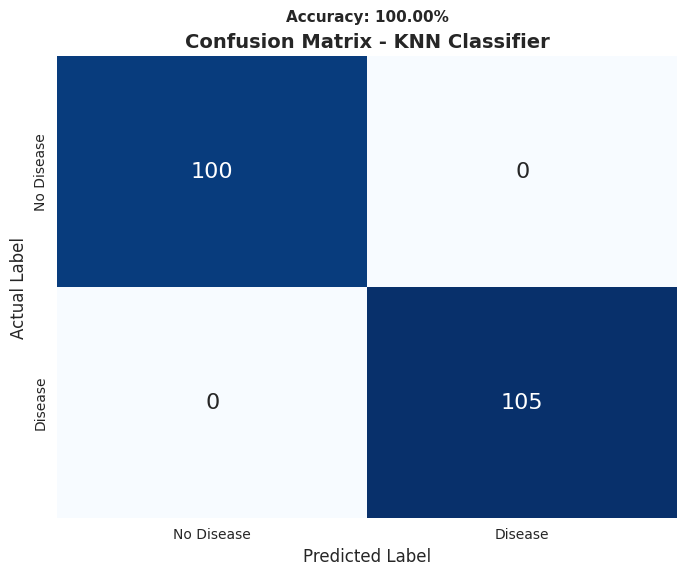

In [52]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=target_names, yticklabels=target_names,
            annot_kws={'size': 16})
plt.title('Confusion Matrix - KNN Classifier', fontsize=14, fontweight='bold')
plt.ylabel('Actual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)

# Add accuracy text
accuracy_text = f'Accuracy: {test_accuracy:.2%}'
plt.text(1, -0.15, accuracy_text, ha='center', fontsize=11, fontweight='bold')

plt.savefig('confusion_matrix_knn.png', dpi=300, bbox_inches='tight')
plt.show()

# ROC Curve

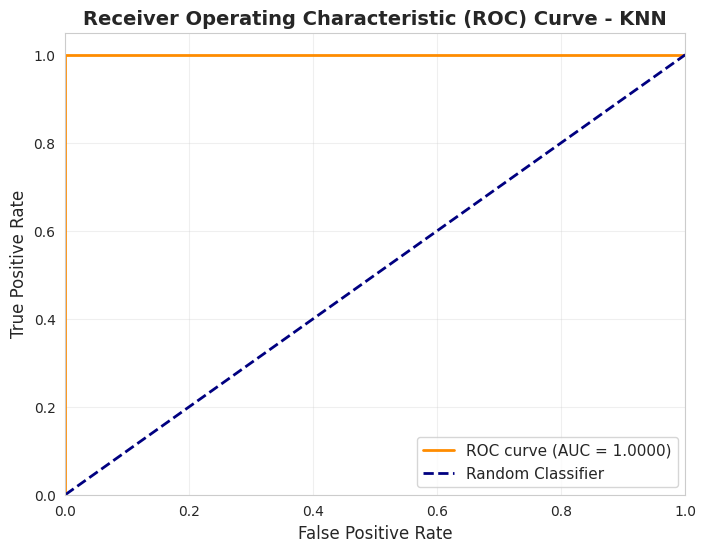

In [53]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
         label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN',
          fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(alpha=0.3)
plt.savefig('roc_curve_knn.png', dpi=300, bbox_inches='tight')
plt.show()

# 2D Decision Boundary Visualization

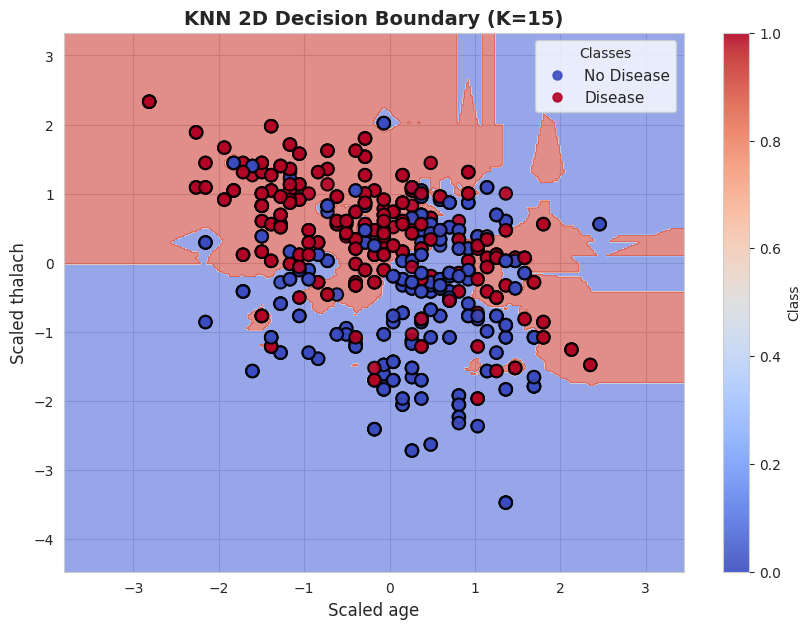

In [65]:
features_2D = ['age', 'thalach']
X_2D = X[features_2D]


X_train_2D, X_test_2D, y_train_2D, y_test_2D = train_test_split(
    X_2D, y, test_size=0.2, random_state=42, stratify=y
)

scaler_2D = StandardScaler()
X_train_2D_scaled = scaler_2D.fit_transform(X_train_2D)
X_test_2D_scaled = scaler_2D.transform(X_test_2D)


knn_2D = KNeighborsClassifier(
    n_neighbors=best_knn.n_neighbors,
    weights=best_knn.weights,
    metric=best_knn.metric
)
knn_2D.fit(X_train_2D_scaled, y_train_2D)


h = 0.02
x_min, x_max = X_train_2D_scaled[:, 0].min() - 1, X_train_2D_scaled[:, 0].max() + 1
y_min, y_max = X_train_2D_scaled[:, 1].min() - 1, X_train_2D_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


Z = knn_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.coolwarm    )

# Plot training points
scatter = plt.scatter(X_train_2D_scaled[:, 0], X_train_2D_scaled[:, 1],
                     c=y_train_2D, cmap=plt.cm.coolwarm    , edgecolors='k',
                     marker='o', s=80, linewidth=1.5, alpha=0.9)


handles, _ = scatter.legend_elements()
plt.legend(handles, target_names, title="Classes", loc='best', fontsize=11)

plt.title(f'KNN 2D Decision Boundary (K={best_knn.n_neighbors})',
          fontsize=14, fontweight='bold')
plt.xlabel(f'Scaled {features_2D[0]}', fontsize=12)
plt.ylabel(f'Scaled {features_2D[1]}', fontsize=12)
plt.colorbar(scatter, label='Class')
plt.savefig('2d_decision_boundary_knn.png', dpi=300, bbox_inches='tight')
plt.show()

#Sample Predictions

In [57]:
predictions_df = pd.DataFrame({
    'Actual_Class': y_test.values,
    'Predicted_Class': y_pred,
    'Actual_Name': [target_names[i] for i in y_test.values],
    'Predicted_Name': [target_names[i] for i in y_pred],
    'Prob_No_Disease': best_knn.predict_proba(X_test_scaled)[:, 0],
    'Prob_Disease': best_knn.predict_proba(X_test_scaled)[:, 1],
    'Correct': y_test.values == y_pred
})

print("\nSample Predictions (First 15 rows):")
print(predictions_df.head(15).to_string(index=False))


correct_predictions = (y_test == y_pred).sum()
total_predictions = len(y_test)
print(f"\n✓ Correct Predictions: {correct_predictions}/{total_predictions} "
      f"({(correct_predictions/total_predictions)*100:.2f}%)")



Sample Predictions (First 15 rows):
 Actual_Class  Predicted_Class Actual_Name Predicted_Name  Prob_No_Disease  Prob_Disease  Correct
            0                0  No Disease     No Disease              1.0           0.0     True
            1                1     Disease        Disease              0.0           1.0     True
            0                0  No Disease     No Disease              1.0           0.0     True
            1                1     Disease        Disease              0.0           1.0     True
            0                0  No Disease     No Disease              1.0           0.0     True
            0                0  No Disease     No Disease              1.0           0.0     True
            1                1     Disease        Disease              0.0           1.0     True
            0                0  No Disease     No Disease              1.0           0.0     True
            1                1     Disease        Disease              0.0       